In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math, time
import torch

In [4]:
res_cnn = np.load('./results/cnn_mlp_objmanifolds_allclasses.npz')
res_gcnn4 = np.load('./results/gcnn4_mlp_objmanifolds_allclasses.npz')
res_gcnn8 = np.load('./results/gcnn8_mlp_objmanifolds_allclasses.npz')
res_gcnn12 = np.load('./results/gcnn12_mlp_objmanifolds_allclasses.npz')

In [5]:
capacities_init_cnn= res_cnn['capacities_init']
radii_init_cnn = res_cnn['radii_init']
dimensions_init_cnn = res_cnn['dimensions_init']
capacities_final_cnn = res_cnn['capacities_final']
radii_final_cnn = res_cnn['radii_final']
dimensions_final_cnn = res_cnn['dimensions_final']
layernames_cnn = res_cnn['layernames_all']


capacities_init_gcnn4= res_gcnn4['capacities_init']
radii_init_gcnn4 = res_gcnn4['radii_init']
dimensions_init_gcnn4 = res_gcnn4['dimensions_init']
capacities_final_gcnn4 = res_gcnn4['capacities_final']
radii_final_gcnn4 = res_gcnn4['radii_final']
dimensions_final_gcnn4 = res_gcnn4['dimensions_final']
layernames_gcnn4 = res_gcnn4['layernames_all']

capacities_init_gcnn8= res_gcnn8['capacities_init']
radii_init_gcnn8 = res_gcnn8['radii_init']
dimensions_init_gcnn8 = res_gcnn8['dimensions_init']
capacities_final_gcnn8 = res_gcnn8['capacities_final']
radii_final_gcnn8 = res_gcnn8['radii_final']
dimensions_final_gcnn8 = res_gcnn8['dimensions_final']
layernames_gcnn8 = res_gcnn8['layernames_all']

capacities_init_gcnn12= res_gcnn12['capacities_init']
radii_init_gcnn12 = res_gcnn12['radii_init']
dimensions_init_gcnn12 = res_gcnn12['dimensions_init']
capacities_final_gcnn12 = res_gcnn12['capacities_final']
radii_final_gcnn12 = res_gcnn12['radii_final']
dimensions_final_gcnn12 = res_gcnn12['dimensions_final']
layernames_gcnn12 = res_gcnn12['layernames_all']


In [6]:
layernames = ['Input', '(G)Conv', '(G)Conv', 'MaxP','(G)Conv','(G)Conv','FC']

Figure 1- init and final parameters for gcnn4

In [7]:

import matplotlib.patches as mpatches
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

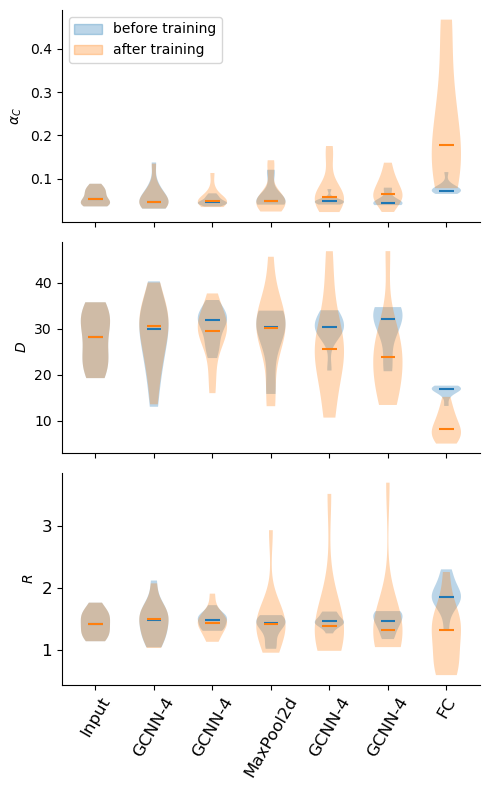

In [8]:
layernames_gcnn4_short = [n.split('_')[2] for n in layernames_gcnn4]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='Linear' else 'FC' for i in range(len(layernames_gcnn4_short))]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='GCNN' else 'GCNN-4' for i in range(len(layernames_gcnn4_short))]

fig, ax = plt.subplots(3,1, figsize=(5, 8), sharex='col')
vcapi = ax[0].violinplot(capacities_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vcapf = ax[0].violinplot(capacities_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0].set_ylabel(r"$\alpha_C$")

ax[1].violinplot(dimensions_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1].violinplot(dimensions_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1].set_ylabel(r"$D$")

ax[2].violinplot(radii_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2].violinplot(radii_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2].set_ylabel(r"$R$")

labels = []
add_label(vcapi, "before training")

add_label(vcapf, "after training")

for i in range(3):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

# for pc in vcapi['bodies']:
#     pc.set_facecolor('red')
#     pc.set_edgecolor('black')

# for i in range(10):
#     plt.plot(capacities_final_gcnn_big[:-1,i],'o-')
# for i in range(7):
#     plt.scatter([i for _ in range(10)], capacities_final_gcnn_big[i,:])
ax[0].legend(*zip(*labels), loc='upper left')

ax[2].set_xticks([i for i, _ in enumerate(layernames_gcnn4_short[:-1])])
ax[2].set_xticklabels(layernames_gcnn4_short[:-1], rotation=60, fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout()

plt.show()
# plt.savefig('./figures/gcnn4_init_final.png', dpi=300)

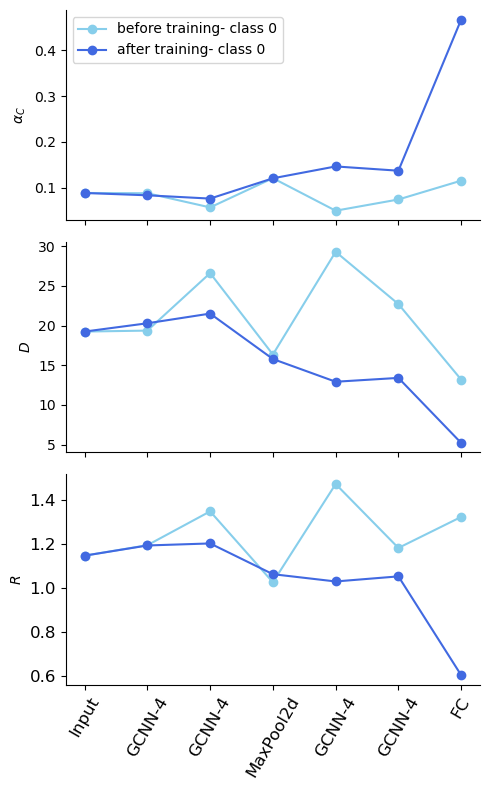

In [9]:
layernames_gcnn4_short = [n.split('_')[2] for n in layernames_gcnn4]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='Linear' else 'FC' for i in range(len(layernames_gcnn4_short))]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='GCNN' else 'GCNN-4' for i in range(len(layernames_gcnn4_short))]

fig, ax = plt.subplots(3,1, figsize=(5, 8), sharex='col')
# vcapi = ax[0].violinplot(capacities_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# vcapf = ax[0].violinplot(capacities_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0].set_ylabel(r"$\alpha_C$")

# ax[1].violinplot(dimensions_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# ax[1].violinplot(dimensions_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1].set_ylabel(r"$D$")

# ax[2].violinplot(radii_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# ax[2].violinplot(radii_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2].set_ylabel(r"$R$")
# labels = []
# add_label(vcapi, "before training")

# add_label(vcapf, "after training")

for i in range(3):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

# for pc in vcapi['bodies']:
#     pc.set_facecolor('red')
#     pc.set_edgecolor('black')

# for i in range(10):
classid = 0
color_init = 'skyblue'
color_final = 'royalblue'

ax[0].plot(capacities_init_gcnn4[:-1,classid],'o-', label='before training- class 0', color=color_init)
ax[1].plot(dimensions_init_gcnn4[:-1,classid],'o-', color=color_init)
ax[2].plot(radii_init_gcnn4[:-1,classid],'o-', color=color_init)

ax[0].plot(capacities_final_gcnn4[:-1,classid],'o-', label='after training- class 0', color=color_final)
ax[1].plot(dimensions_final_gcnn4[:-1,classid],'o-', color=color_final)
ax[2].plot(radii_final_gcnn4[:-1,classid],'o-', color=color_final)

ax[0].legend()
# for i in range(7):
#     plt.scatter([i for _ in range(10)], capacities_final_gcnn_big[i,:])
# ax[0].legend(*zip(*labels), loc='upper left')

ax[2].set_xticks([i for i, _ in enumerate(layernames_gcnn4_short[:-1])])
ax[2].set_xticklabels(layernames_gcnn4_short[:-1], rotation=60, fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout()

plt.show()
# plt.savefig('./figures/gcnn4_oneclass_init_final.png', dpi=300)

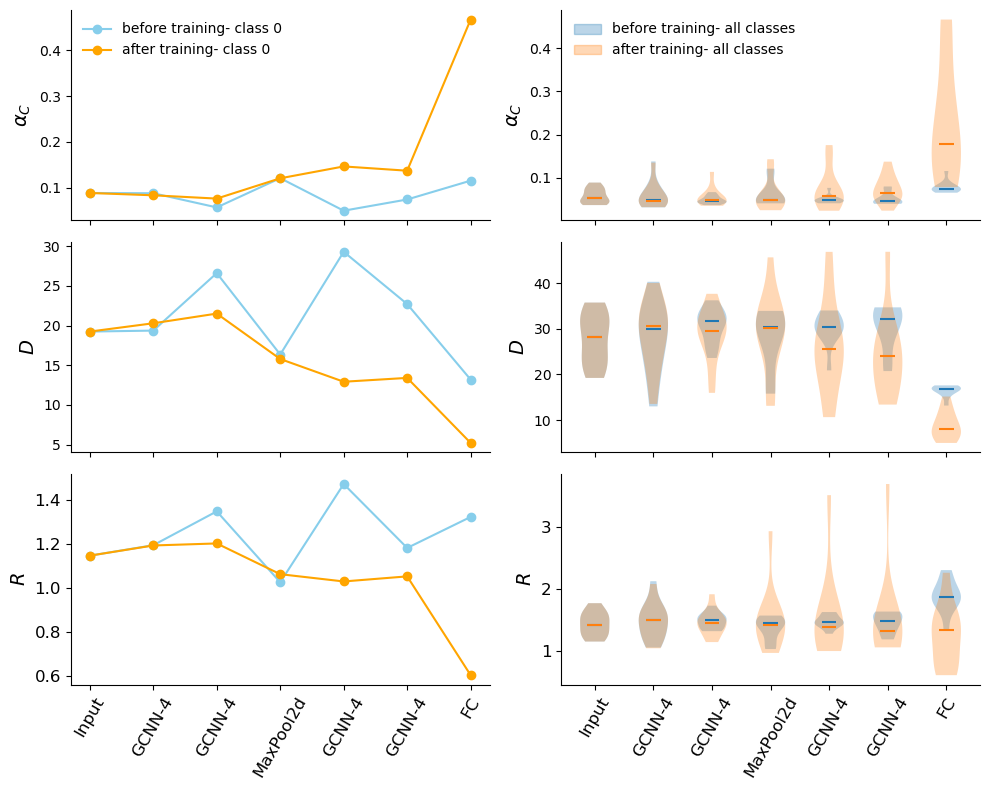

In [10]:
layernames_gcnn4_short = [n.split('_')[2] for n in layernames_gcnn4]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='Linear' else 'FC' for i in range(len(layernames_gcnn4_short))]
layernames_gcnn4_short = [layernames_gcnn4_short[i] if layernames_gcnn4_short[i]!='GCNN' else 'GCNN-4' for i in range(len(layernames_gcnn4_short))]

fig, ax = plt.subplots(3,2, figsize=(10, 8), sharex='col')
# vcapi = ax[0].violinplot(capacities_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# vcapf = ax[0].violinplot(capacities_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0,0].set_ylabel(r"$\alpha_C$", fontsize=14)

# ax[1].violinplot(dimensions_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# ax[1].violinplot(dimensions_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,0].set_ylabel(r"$D$", fontsize=14)

# ax[2].violinplot(radii_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
# ax[2].violinplot(radii_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,0].set_ylabel(r"$R$", fontsize=14)
# labels = []
# add_label(vcapi, "before training")

# add_label(vcapf, "after training")

for i in range(3):
    ax[i,0].spines['top'].set_visible(False)
    ax[i,0].spines['right'].set_visible(False)

# for pc in vcapi['bodies']:
#     pc.set_facecolor('red')
#     pc.set_edgecolor('black')

# for i in range(10):
classid = 0
color_init = 'skyblue'
color_final = 'orange'

ax[0,0].plot(capacities_init_gcnn4[:-1,classid],'o-', label='before training- class 0', color=color_init)
ax[1,0].plot(dimensions_init_gcnn4[:-1,classid],'o-', color=color_init)
ax[2,0].plot(radii_init_gcnn4[:-1,classid],'o-', color=color_init)

ax[0,0].plot(capacities_final_gcnn4[:-1,classid],'o-', label='after training- class 0', color=color_final)
ax[1,0].plot(dimensions_final_gcnn4[:-1,classid],'o-', color=color_final)
ax[2,0].plot(radii_final_gcnn4[:-1,classid],'o-', color=color_final)

ax[0,0].legend(frameon=False)
# for i in range(7):
#     plt.scatter([i for _ in range(10)], capacities_final_gcnn_big[i,:])
# ax[0].legend(*zip(*labels), loc='upper left')

ax[2,0].set_xticks([i for i, _ in enumerate(layernames_gcnn4_short[:-1])])
ax[2,0].set_xticklabels(layernames_gcnn4_short[:-1], rotation=60, fontsize=12)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)


vcapi = ax[0,1].violinplot(capacities_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vcapf = ax[0,1].violinplot(capacities_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0,1].set_ylabel(r"$\alpha_C$", fontsize=14)

ax[1,1].violinplot(dimensions_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].violinplot(dimensions_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].set_ylabel(r"$D$", fontsize=14)

ax[2,1].violinplot(radii_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].violinplot(radii_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].set_ylabel(r"$R$", fontsize=14)

labels = []
add_label(vcapi, "before training- all classes")

add_label(vcapf, "after training- all classes")

for i in range(3):
    ax[i,1].spines['top'].set_visible(False)
    ax[i,1].spines['right'].set_visible(False)

# for pc in vcapi['bodies']:
#     pc.set_facecolor('red')
#     pc.set_edgecolor('black')

# for i in range(10):
#     plt.plot(capacities_final_gcnn_big[:-1,i],'o-')
# for i in range(7):
#     plt.scatter([i for _ in range(10)], capacities_final_gcnn_big[i,:])
ax[0,1].legend(*zip(*labels), loc='upper left', frameon=False)

ax[2,1].set_xticks([i for i, _ in enumerate(layernames_gcnn4_short[:-1])])
ax[2,1].set_xticklabels(layernames_gcnn4_short[:-1], rotation=60, fontsize=12)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

fig.tight_layout()

# plt.savefig('./figures/gcnn4_init_final.png', dpi=300)

Text(0.5, 1.0, 'After training')

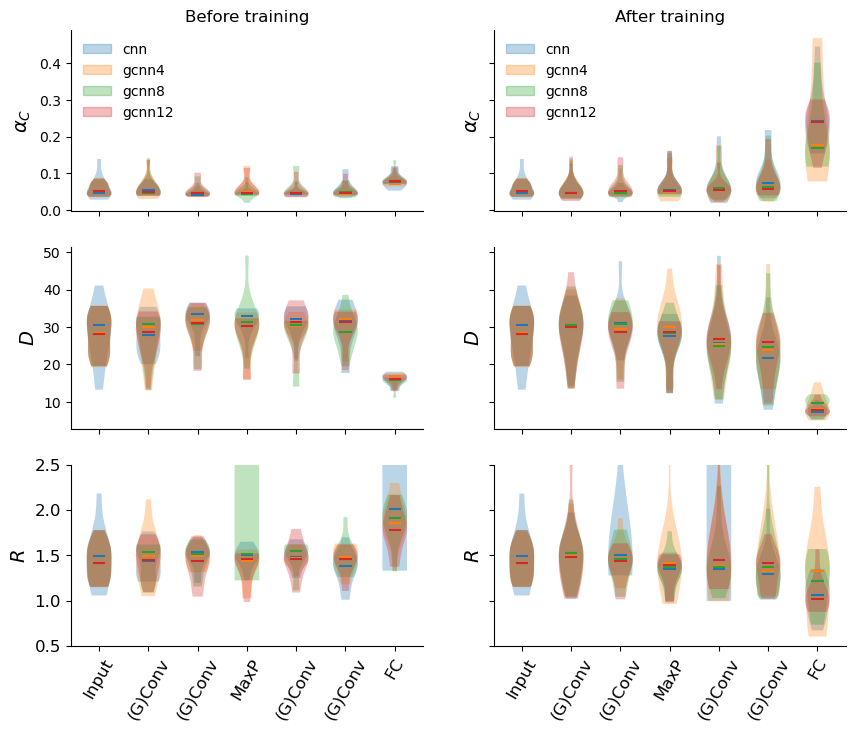

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharex='col', sharey='row')

vcnn = ax[0,0].violinplot(capacities_init_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn4 = ax[0,0].violinplot(capacities_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn8 = ax[0,0].violinplot(capacities_init_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn12 = ax[0,0].violinplot(capacities_init_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0,0].set_ylabel(r"$\alpha_C$",fontsize=14)

ax[1,0].violinplot(dimensions_init_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,0].violinplot(dimensions_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,0].violinplot(dimensions_init_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,0].violinplot(dimensions_init_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,0].set_ylabel(r"$D$",fontsize=14)

ax[2,0].violinplot(radii_init_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,0].violinplot(radii_init_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,0].violinplot(radii_init_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,0].violinplot(radii_init_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,0].set_ylim(0, 2)
ax[2,0].set_ylabel(r"$R$",fontsize=14)
labels=[]
add_label(vcnn,"cnn")
add_label(vgcnn4,"gcnn4")
add_label(vgcnn8,"gcnn8")
add_label(vgcnn12,"gcnn12")
ax[0,0].legend(*zip(*labels))


vcnnf = ax[0,1].violinplot(capacities_final_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn4f = ax[0,1].violinplot(capacities_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn8f = ax[0,1].violinplot(capacities_final_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
vgcnn12f = ax[0,1].violinplot(capacities_final_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[0,1].set_ylabel(r"$\alpha_C$",fontsize=14)

ax[1,1].violinplot(dimensions_final_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].violinplot(dimensions_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].violinplot(dimensions_final_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].violinplot(dimensions_final_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[1,1].set_ylabel(r"$D$",fontsize=14)

ax[2,1].violinplot(radii_final_cnn[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].violinplot(radii_final_gcnn4[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].violinplot(radii_final_gcnn8[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].violinplot(radii_final_gcnn12[:-1,:].T, positions=np.arange(7),showmedians=True,showextrema=False)
ax[2,1].set_ylim(0.5, 2.5)
ax[2,1].set_ylabel(r"$R$",fontsize=14)
labels=[]
add_label(vcnnf,"cnn")
add_label(vgcnn4f,"gcnn4")
add_label(vgcnn8f,"gcnn8")
add_label(vgcnn12f,"gcnn12")
ax[0,1].legend(*zip(*labels), loc='upper left', frameon=False)
labels=[]
add_label(vcnn,"cnn")
add_label(vgcnn4,"gcnn4")
add_label(vgcnn8,"gcnn8")
add_label(vgcnn12,"gcnn12")
ax[0,0].legend(*zip(*labels), loc='upper left', frameon=False)

ax[2,1].set_xticks([i for i, _ in enumerate(layernames)])
ax[2,1].set_xticklabels(layernames, rotation=60, fontsize=12)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

ax[2,0].set_xticks([i for i, _ in enumerate(layernames)])
ax[2,0].set_xticklabels(layernames, rotation=60, fontsize=12)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)


for i in range(3):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)

ax[0,0].set_title("Before training")
ax[0,1].set_title("After training")

# plt.savefig('./figures/comparemodels_init_final.png', dpi=300)

In [12]:
capacities_all = np.zeros((4, 2, *capacities_init_cnn.shape)) #(models, init/final, layers, classes)
capacities_all[0, 0,:,:] = capacities_init_cnn[:,:]
capacities_all[1,0,:,:] = capacities_init_gcnn4[:,:]
capacities_all[2,0,:,:] = capacities_init_gcnn8[:,:]
capacities_all[3,0,:,:] = capacities_init_gcnn12[:,:]

capacities_all[0,1,:,:] = capacities_final_cnn[:,:]
capacities_all[1,1,:,:] = capacities_final_gcnn4[:,:]
capacities_all[2,1,:,:] = capacities_final_gcnn8[:,:]
capacities_all[3,1,:,:] = capacities_final_gcnn12[:,:]

dimensions_all = np.zeros((4, 2, *dimensions_init_cnn.shape)) #(models, init/final, layers, classes)
dimensions_all[0, 0,:,:] = dimensions_init_cnn[:,:]
dimensions_all[1,0,:,:] = dimensions_init_gcnn4[:,:]
dimensions_all[2,0,:,:] = dimensions_init_gcnn8[:,:]
dimensions_all[3,0,:,:] = dimensions_init_gcnn12[:,:]

dimensions_all[0,1,:,:] = dimensions_final_cnn[:,:]
dimensions_all[1,1,:,:] = dimensions_final_gcnn4[:,:]
dimensions_all[2,1,:,:] = dimensions_final_gcnn8[:,:]
dimensions_all[3,1,:,:] = dimensions_final_gcnn12[:,:]

radii_all = np.zeros((4, 2, *radii_init_cnn.shape)) #(models, init/final, layers, classes)
radii_all[0, 0,:,:] = radii_init_cnn[:,:]
radii_all[1,0,:,:] = radii_init_gcnn4[:,:]
radii_all[2,0,:,:] = radii_init_gcnn8[:,:]
radii_all[3,0,:,:] = radii_init_gcnn12[:,:]

radii_all[0,1,:,:] = radii_final_cnn[:,:]
radii_all[1,1,:,:] = radii_final_gcnn4[:,:]
radii_all[2,1,:,:] = radii_final_gcnn8[:,:]
radii_all[3,1,:,:] = radii_final_gcnn12[:,:]




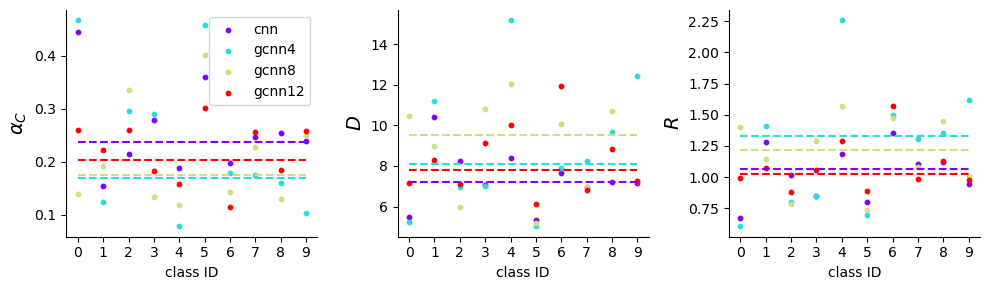

In [13]:
import matplotlib.cm as cm
x = np.arange(10)
xmodel = np.arange(4)
colors_classes = cm.tab10(np.linspace(0, 1, len(x)))
colors_models = cm.rainbow(np.linspace(0, 1, len(xmodel)))
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex='col')

# for i in range(4):
#     ax[0].scatter(i*np.ones(10), capacities_all[i,1,-2,:], color=colors_classes)
#     ax[1].scatter(i*np.ones(10), dimensions_all[i,1,-2,:], color=colors_classes)
#     ax[2].scatter(i*np.ones(10), radii_all[i,1,-2,:], color=colors_classes)
labels_allmodels = ['cnn', 'gcnn4', 'gcnn8', 'gcnn12']
markersize = 10
for i in range(10):
    for j in range(4):
        if i==0:
            ax[0].scatter(i*np.ones(1), capacities_all[j,1,-2,i], color=colors_models[j], label=labels_allmodels[j],s=markersize)
        else:
            ax[0].scatter(i*np.ones(1), capacities_all[j,1,-2,i], color=colors_models[j], s=markersize)
        ax[1].scatter(i*np.ones(1), dimensions_all[j,1,-2,i], color=colors_models[j], s=markersize)
        ax[2].scatter(i*np.ones(1), radii_all[j,1,-2,i], color=colors_models[j], s=markersize)
    
for j in range(4):
    ax[0].hlines(1/np.mean(1/capacities_all[j,1,-2,:]),0, 9, linestyles='dashed', colors=colors_models[j])
    ax[1].hlines(np.median(dimensions_all[j,1,-2,:]), 0, 9, linestyles='dashed', colors=colors_models[j])
    ax[2].hlines(np.median(radii_all[j,1,-2,:]), 0, 9, linestyles='dashed', colors=colors_models[j])
    

# handles, labels = scatter_0.legend_elements()
# legend = ax[0].legend(handles = handles, labels = ["cnn", "gcnn4", "gcnn8", "gcnn12"], title="Models")

ax[0].set_ylabel(r"$\alpha_C$", fontsize=14)
ax[1].set_ylabel(r"$D$", fontsize=14)
ax[2].set_ylabel(r"$R$", fontsize=14)
ax[0].legend()
for i in range(3):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)


for i in range(3):
    ax[i].set_xticks(ticks=np.arange(10))
    ax[i].set_xlabel("class ID")
fig.tight_layout()

# plt.savefig('./figures/lastlayer_compare.png', dpi=300)